In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statistics
from scipy.stats import norm
from scipy.optimize import curve_fit

In [231]:
def average_chunks(arr,n):
    chunks = []
    for i in range(0, len(arr), n):
        chunk = arr[i:i+n]
        chunk_average = sum(chunk) / len(chunk)
        chunks.append(chunk_average)
    return chunks

def median_chunks(arr,n):
    chunks = []
    for i in range(0, len(arr), n):
        chunk = arr[i:i+n]
        chunk_median = statistics.median(chunk)
        chunks.append(chunk_median)
    return chunks

def get_max_floats(input_list, front_ratio):
    # Calculate the number of elements to be selected
    num_elements = int(len(input_list) * front_ratio)
    
    # Sort the input list in descending order
    sorted_list = sorted(input_list, reverse=True)
    
    # Get the maximum 35% of floats
    max_floats = sorted_list[:num_elements]
    
    # Get the indexes of the selected floats
    indexes = [i for i, val in enumerate(input_list) if val in max_floats]
    
    return max_floats, indexes

def get_max_floats_partial(input_list, front_ratio):
    temp = np.copy(input_list)
    indices = []
    
    numbers = int(len(temp)*front_ratio)
    
    for i in range(numbers):
        max_index = np.argmax(temp)
        indices.append(max_index)
        temp[max_index] = 0
    
    return indices

def truncator(arr, min_Val, ind = False):
    trunk = []
    ind = []
    for i in range(len(arr)):
        if arr[i] >= min_Val:
            trunk.append(arr[i])
    if ind == True:
        i.append(ind)
        return trunk, ind
    else:
        return trunk

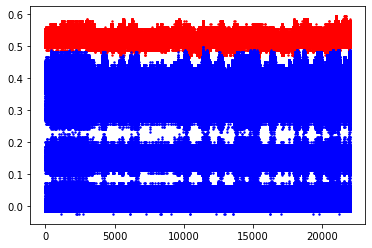

In [5]:
# data = []
# directory = 'C:\\Users\\scientist\\code\\jam\\tommy\\PLIS\\Good PLIS Data\\0604 overnight'
# timestamp = '20230605_050956' # '20230531_234133'


# file_index = 1753 # Change this to include how many files
# for file_index in range(1, file_index + 1,100):
#     csv_file = f'{directory}/data_{timestamp}_{file_index}.csv'
#     data_chunk = np.genfromtxt(csv_file, delimiter=',', skip_header=1)
#     data.append(data_chunk)

# # Concatenate the data chunks into a single array
# data = np.concatenate(data)

# # Extract the time, channel 1, and channel 2 arrays
# time = data[:, 0]
# ch1 = data[:, 1]
# ch2 = data[:, 2]

data = []
directory = 'C:\\Users\\scientist\\code\\jam\\tommy\\PLIS\\Good PLIS Data\\0604 overnight'
timestamp = '20230605_050956' # '20230531_234133'


file_index = 6994 # Change this to include how many files
for file_index in range(1, file_index + 1):
    csv_file = f'{directory}/data_{timestamp}_{file_index}.csv'
    data_chunk = np.genfromtxt(csv_file, delimiter=',', skip_header=1)
    data.append(data_chunk)

# Concatenate the data chunks into a single array
data = np.concatenate(data)

# Extract the time, channel 1, and channel 2 arrays
time = data[:, 0]
ch1 = data[:, 1]
ch2 = data[:, 2]
# time = np.append(time, data[:, 0])
# ch1 = np.append(ch1, data[:, 1])
# ch2 = np.append(ch2, data[:, 2])

#indices_to_keep = get_max_floats_partial(ch2, 0.35)

#time = time[indices_to_keep]
#ch1 = ch1[indices_to_keep]
#ch2 = ch2[indices_to_keep]


# trunk2 = truncator(ch2, 0.32)
# ch2 = ch2[index]
# ch1 = ch1[index]
# time = time[index]


# fig = plt.figure(figsize=(8, 6), dpi=600)
# plt.tick_params(axis='both', labelsize=12, direction='in')
# # plt.scatter(time, ch2, s=1)

# #ch2 = np.array(average_chunks(ch2,100))
# #ch1 = np.array(average_chunks(ch1,100))
# #time = np.array(median_chunks(time,100))

plt.scatter(time, ch1, s=8, c='red', marker='.', label = "Stabilized Signal")
plt.scatter(time, ch2, s=8, c='blue', marker='.', label = "Raw Signal")
# plt.ylim(0, 0.6)
#plt.xlim(2.9, 3.1)

#print(np.std(ch2)*100)
#print(np.std(ch1)*100)

#print((np.std(ch2)/np.mean(ch2))*100)
#print((np.std(ch1)/np.mean(ch1))*100)

# plt.xlabel("Time (s)", fontsize=14)
# plt.ylabel("Voltage (V)", fontsize=14)
# plt.title("Stabilized v.s. Raw @ 100 kHz", fontsize=18)
# #plt.legend(['Raw Signal', 'Stabilized Signal', ], loc='upper left', prop={'size': 10})
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.savefig('C:\\Users\\scientist\\Desktop\\PLIS Temp Graphs\\10kHz_2.png', dpi=600, bbox_inches='tight')


In [8]:
# What to do next:
# 1. Plot histogram for RAW, calculate std
# 2.5 Fix truncator
# 2. Plot histogram for Stabilized, calculate std.
plt.figure(figsize=(12,8), dpi=1000)
binning = 10

plt.hist(ch1, bins=10, color='blue', label = 'Raw')
plt.xlabel("Voltage (V)", fontsize=14)
plt.ylabel("Number of counts", fontsize=14)
plt.title("Raw Signal over 6 Hours", fontsize=18)
# plt.savefig('C:\\Users\\scientist\\code\\pulsed_laser_intensity_stabilization\\6 hour raw.png', dpi=1000, bbox_inches='tight')

fig = plt.figure(figsize=(12,8), dpi=1000)
plt.hist(ch2, bins=50, color='red', label = 'Stabilized')

#plt.xticks(0, 0.6, 80)

plt.xlabel("Voltage (V)", fontsize=14)
plt.ylabel("Number of counts", fontsize=14)
plt.title("Stabilized Signal over 6 Hours", fontsize=18)
# plt.savefig('C:\\Users\\scientist\\code\\pulsed_laser_intensity_stabilization\\6 hour stabilized.png', dpi=1000, bbox_inches='tight')

In [236]:
c = truncator(ch2, 0.34)

print(np.std(c)/np.mean(c))

print(np.std(ch1)/np.mean(ch1))

0.043177267807695284
0.03239225418878842


In [9]:
data = []
directory = 'C:\\Users\\scientist\\code\\jam\\tommy\\PLIS\\Good PLIS Data\\0604 overnight'
timestamp = '20230605_050956' # '20230531_234133'


file_index = 58 # Change this to include how many files
for file_index in range(1, file_index + 1):
    csv_file = f'{directory}/data_{timestamp}_{file_index}.csv'
    data_chunk = np.genfromtxt(csv_file, delimiter=',', skip_header=1)
    data.append(data_chunk)

# Concatenate the data chunks into a single array
data = np.concatenate(data)

# Extract the time, channel 1, and channel 2 arrays
ch2 = data[:, 2]

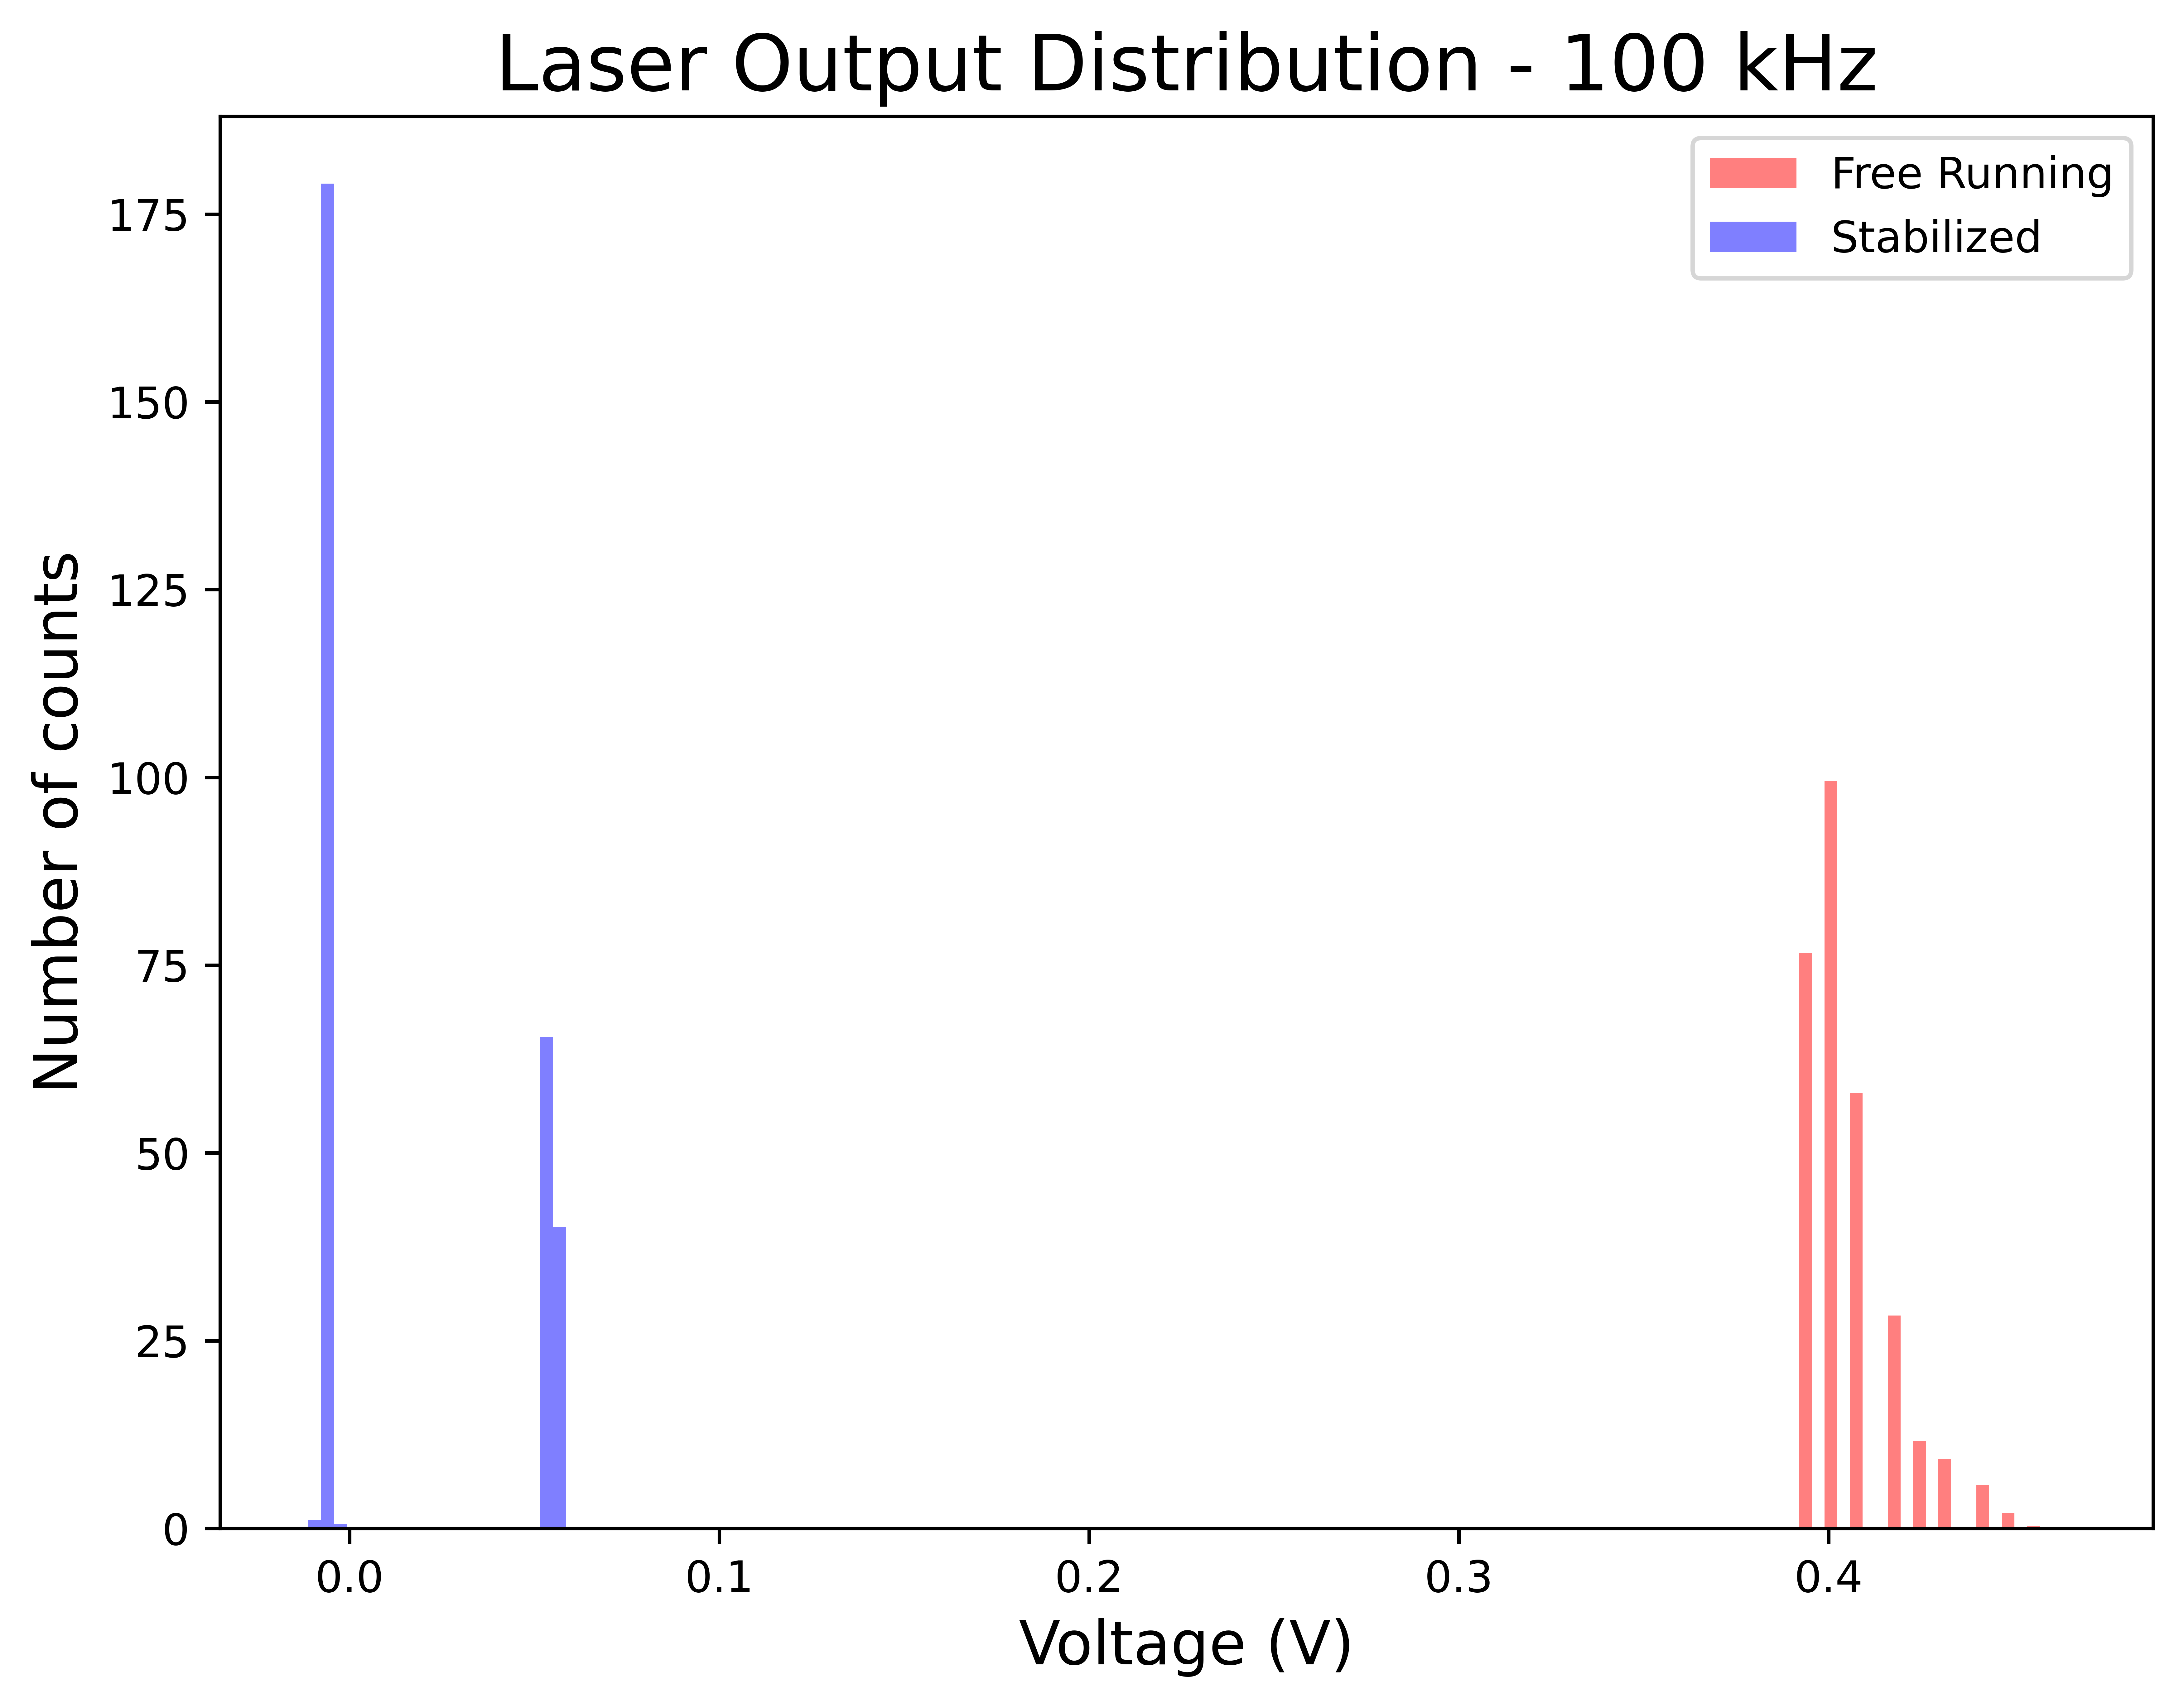

In [10]:
data = []
directory = 'C:\\Users\\scientist\\code\\jam\\tommy\\PLIS\\Good PLIS Data'
timestamp = '20230604_144919' # '20230531_234133'


file_index = 58 # Change this to include how many files
for file_index in range(1, file_index + 1):
    csv_file = f'{directory}/data_{timestamp}_{file_index}.csv'
    data_chunk = np.genfromtxt(csv_file, delimiter=',', skip_header=1)
    data.append(data_chunk)

# Concatenate the data chunks into a single array
data = np.concatenate(data)

# Extract the time, channel 1, and channel 2 arrays
time = data[:, 0]
ch1 = data[:, 1]
ch2comp = data[:, 2]



indices_to_keep = get_max_floats_partial(ch2, 0.40)

time = time[indices_to_keep]
ch1 = ch1[indices_to_keep]
ch2 = ch2[indices_to_keep]
ch2comp = ch2comp[indices_to_keep]







#fig = plt.figure(figsize=(8, 6), dpi=600)
#plt.tick_params(axis='both', labelsize=12, direction='in')
# plt.scatter(time, ch2, s=1)

# ch2 = np.array(average_chunks(ch2,7))
# ch1 = np.array(average_chunks(ch1,7))
# time = np.array(median_chunks(time,7))

#plt.scatter(time, ch2comp, s=8, c='red', marker='.', label = "Stabilized Signal")
#plt.scatter(time, ch1, s=8, c='blue', marker='.', label = "Raw Signal")
# plt.ylim(0, 2.75)
#plt.xlim(2.9, 3.1)

plt.figure(figsize=(8,6), dpi=1000)
binning = 21
plt.hist(ch2, bins=binning, color='red', density = True, alpha=0.5, label = 'Free Running')
plt.hist(ch2comp, bins=binning, color='blue', density = True, alpha=0.5, label = 'Stabilized')


plt.xlabel("Voltage (V)", fontsize=14)
plt.ylabel("Number of counts", fontsize=14)
plt.title("Laser Output Distribution - 100 kHz", fontsize=18)
plt.legend()

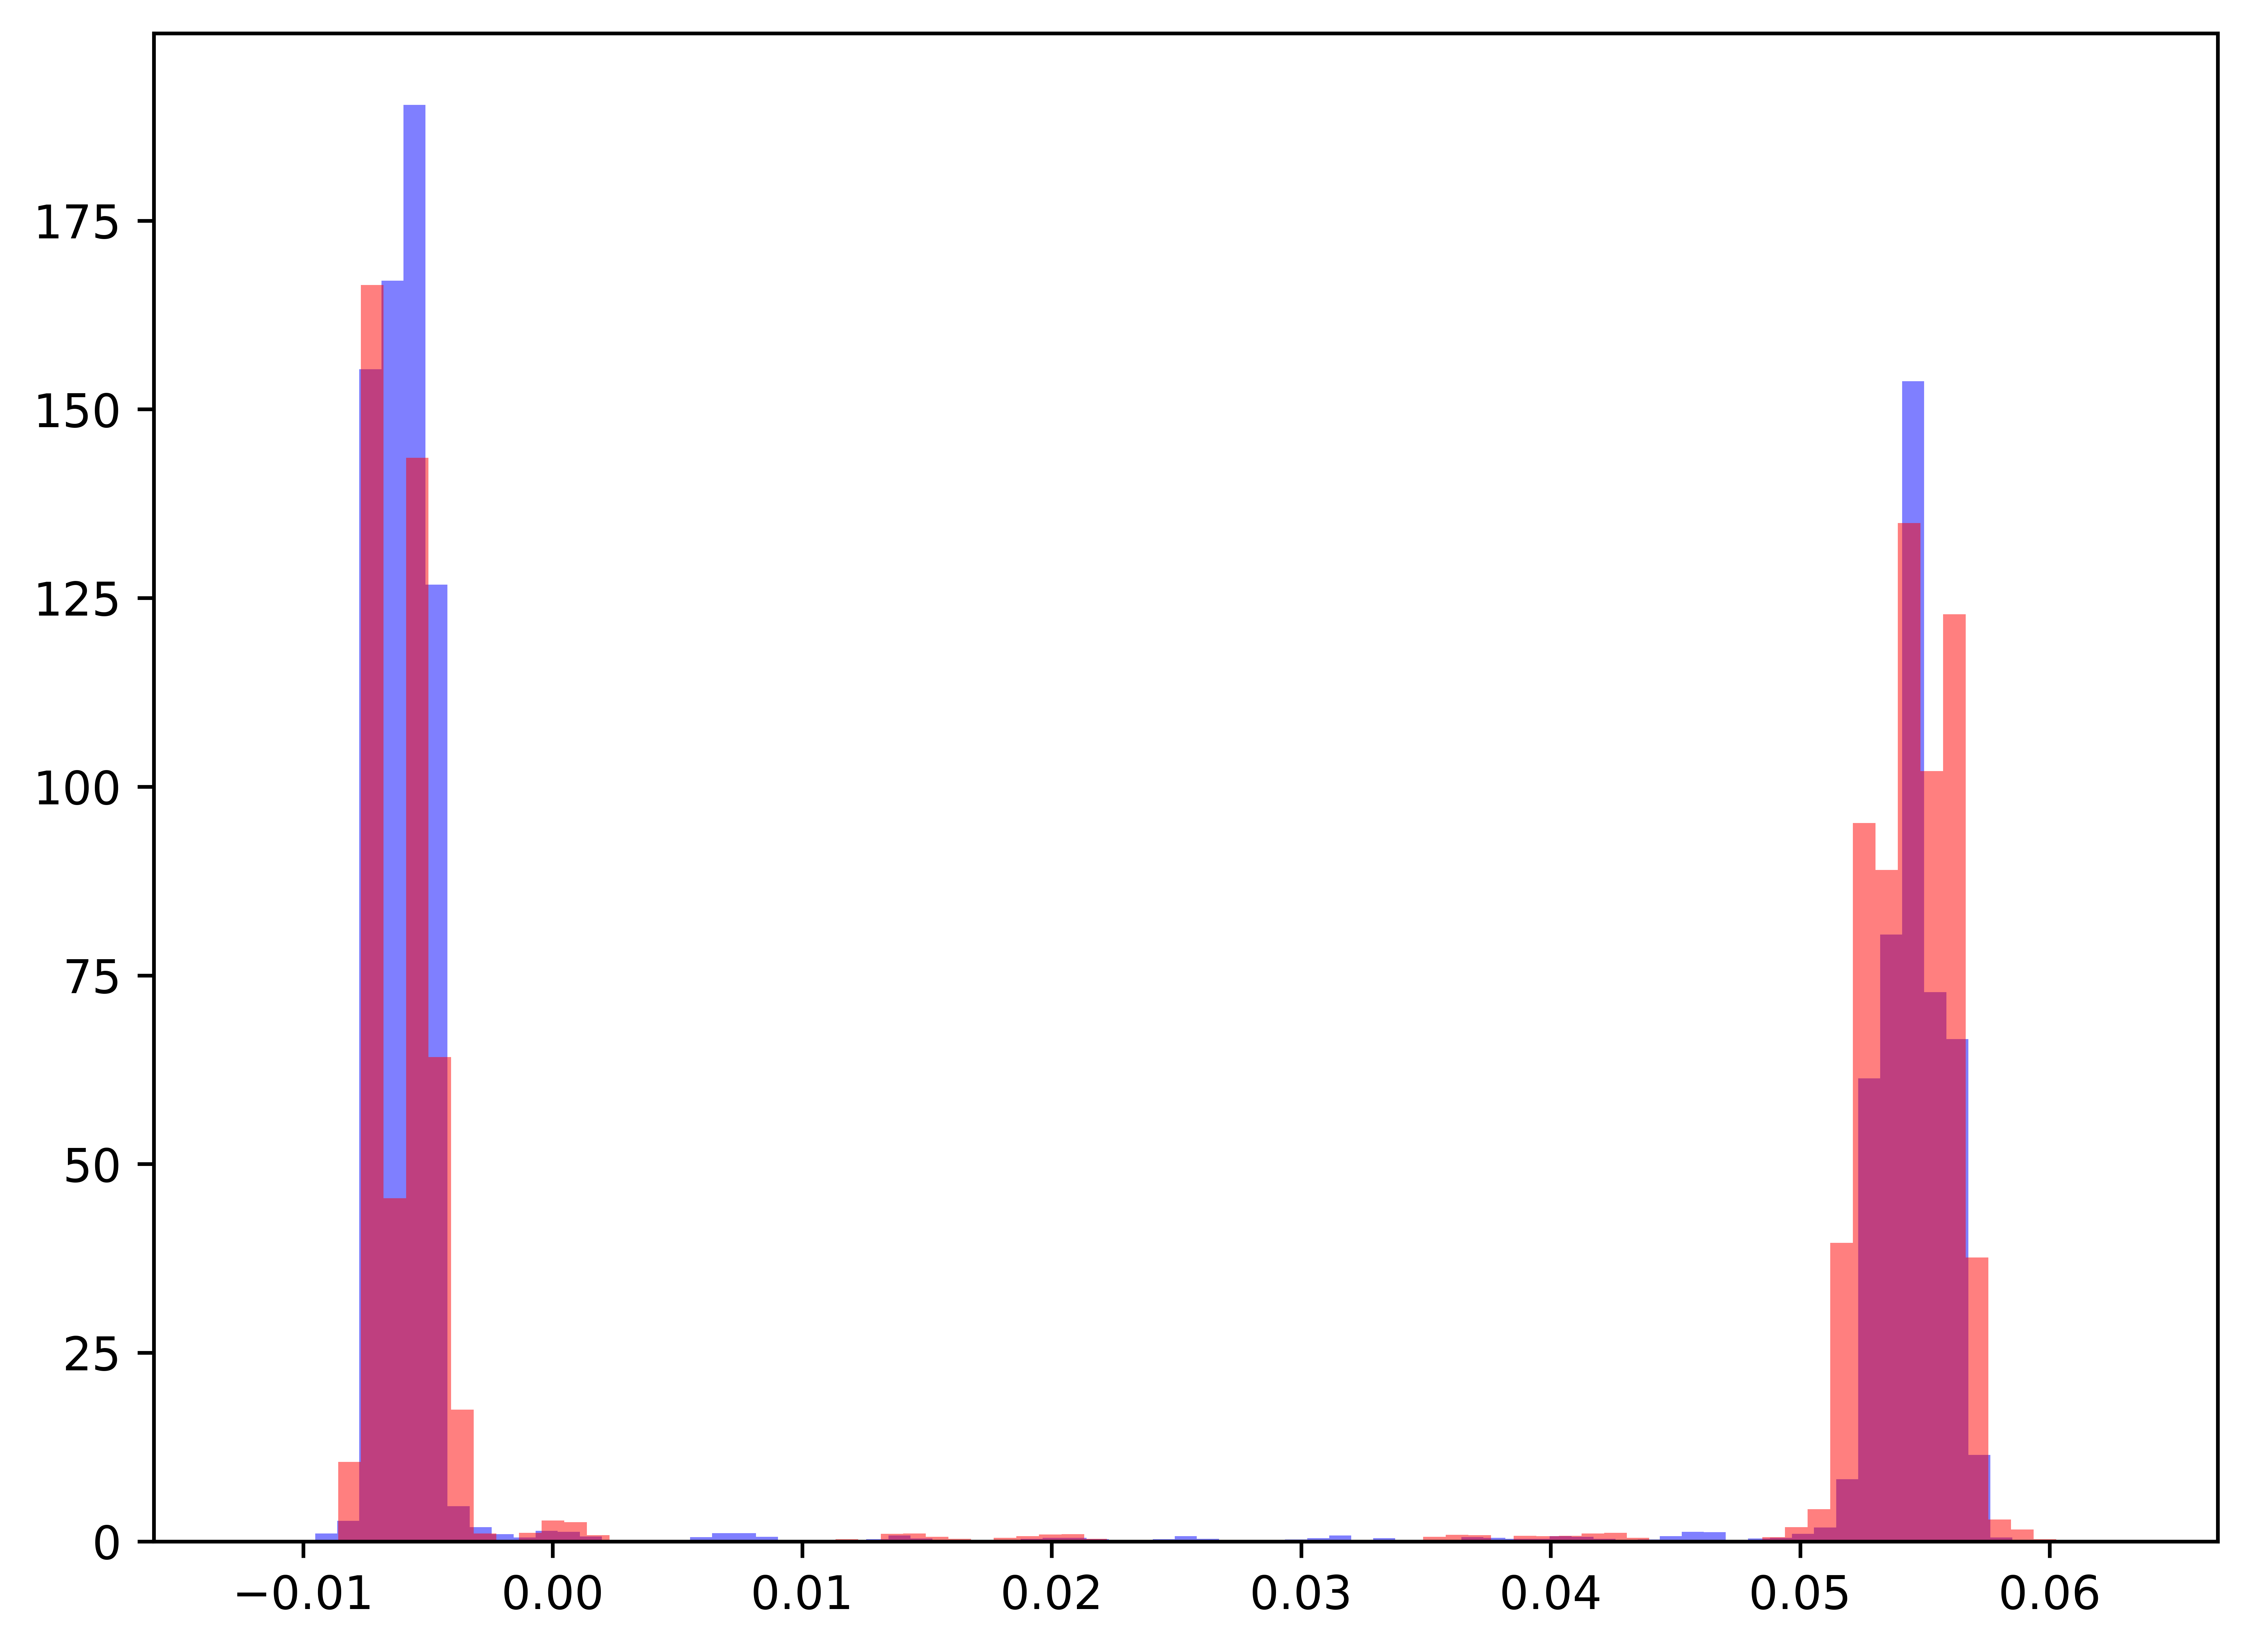

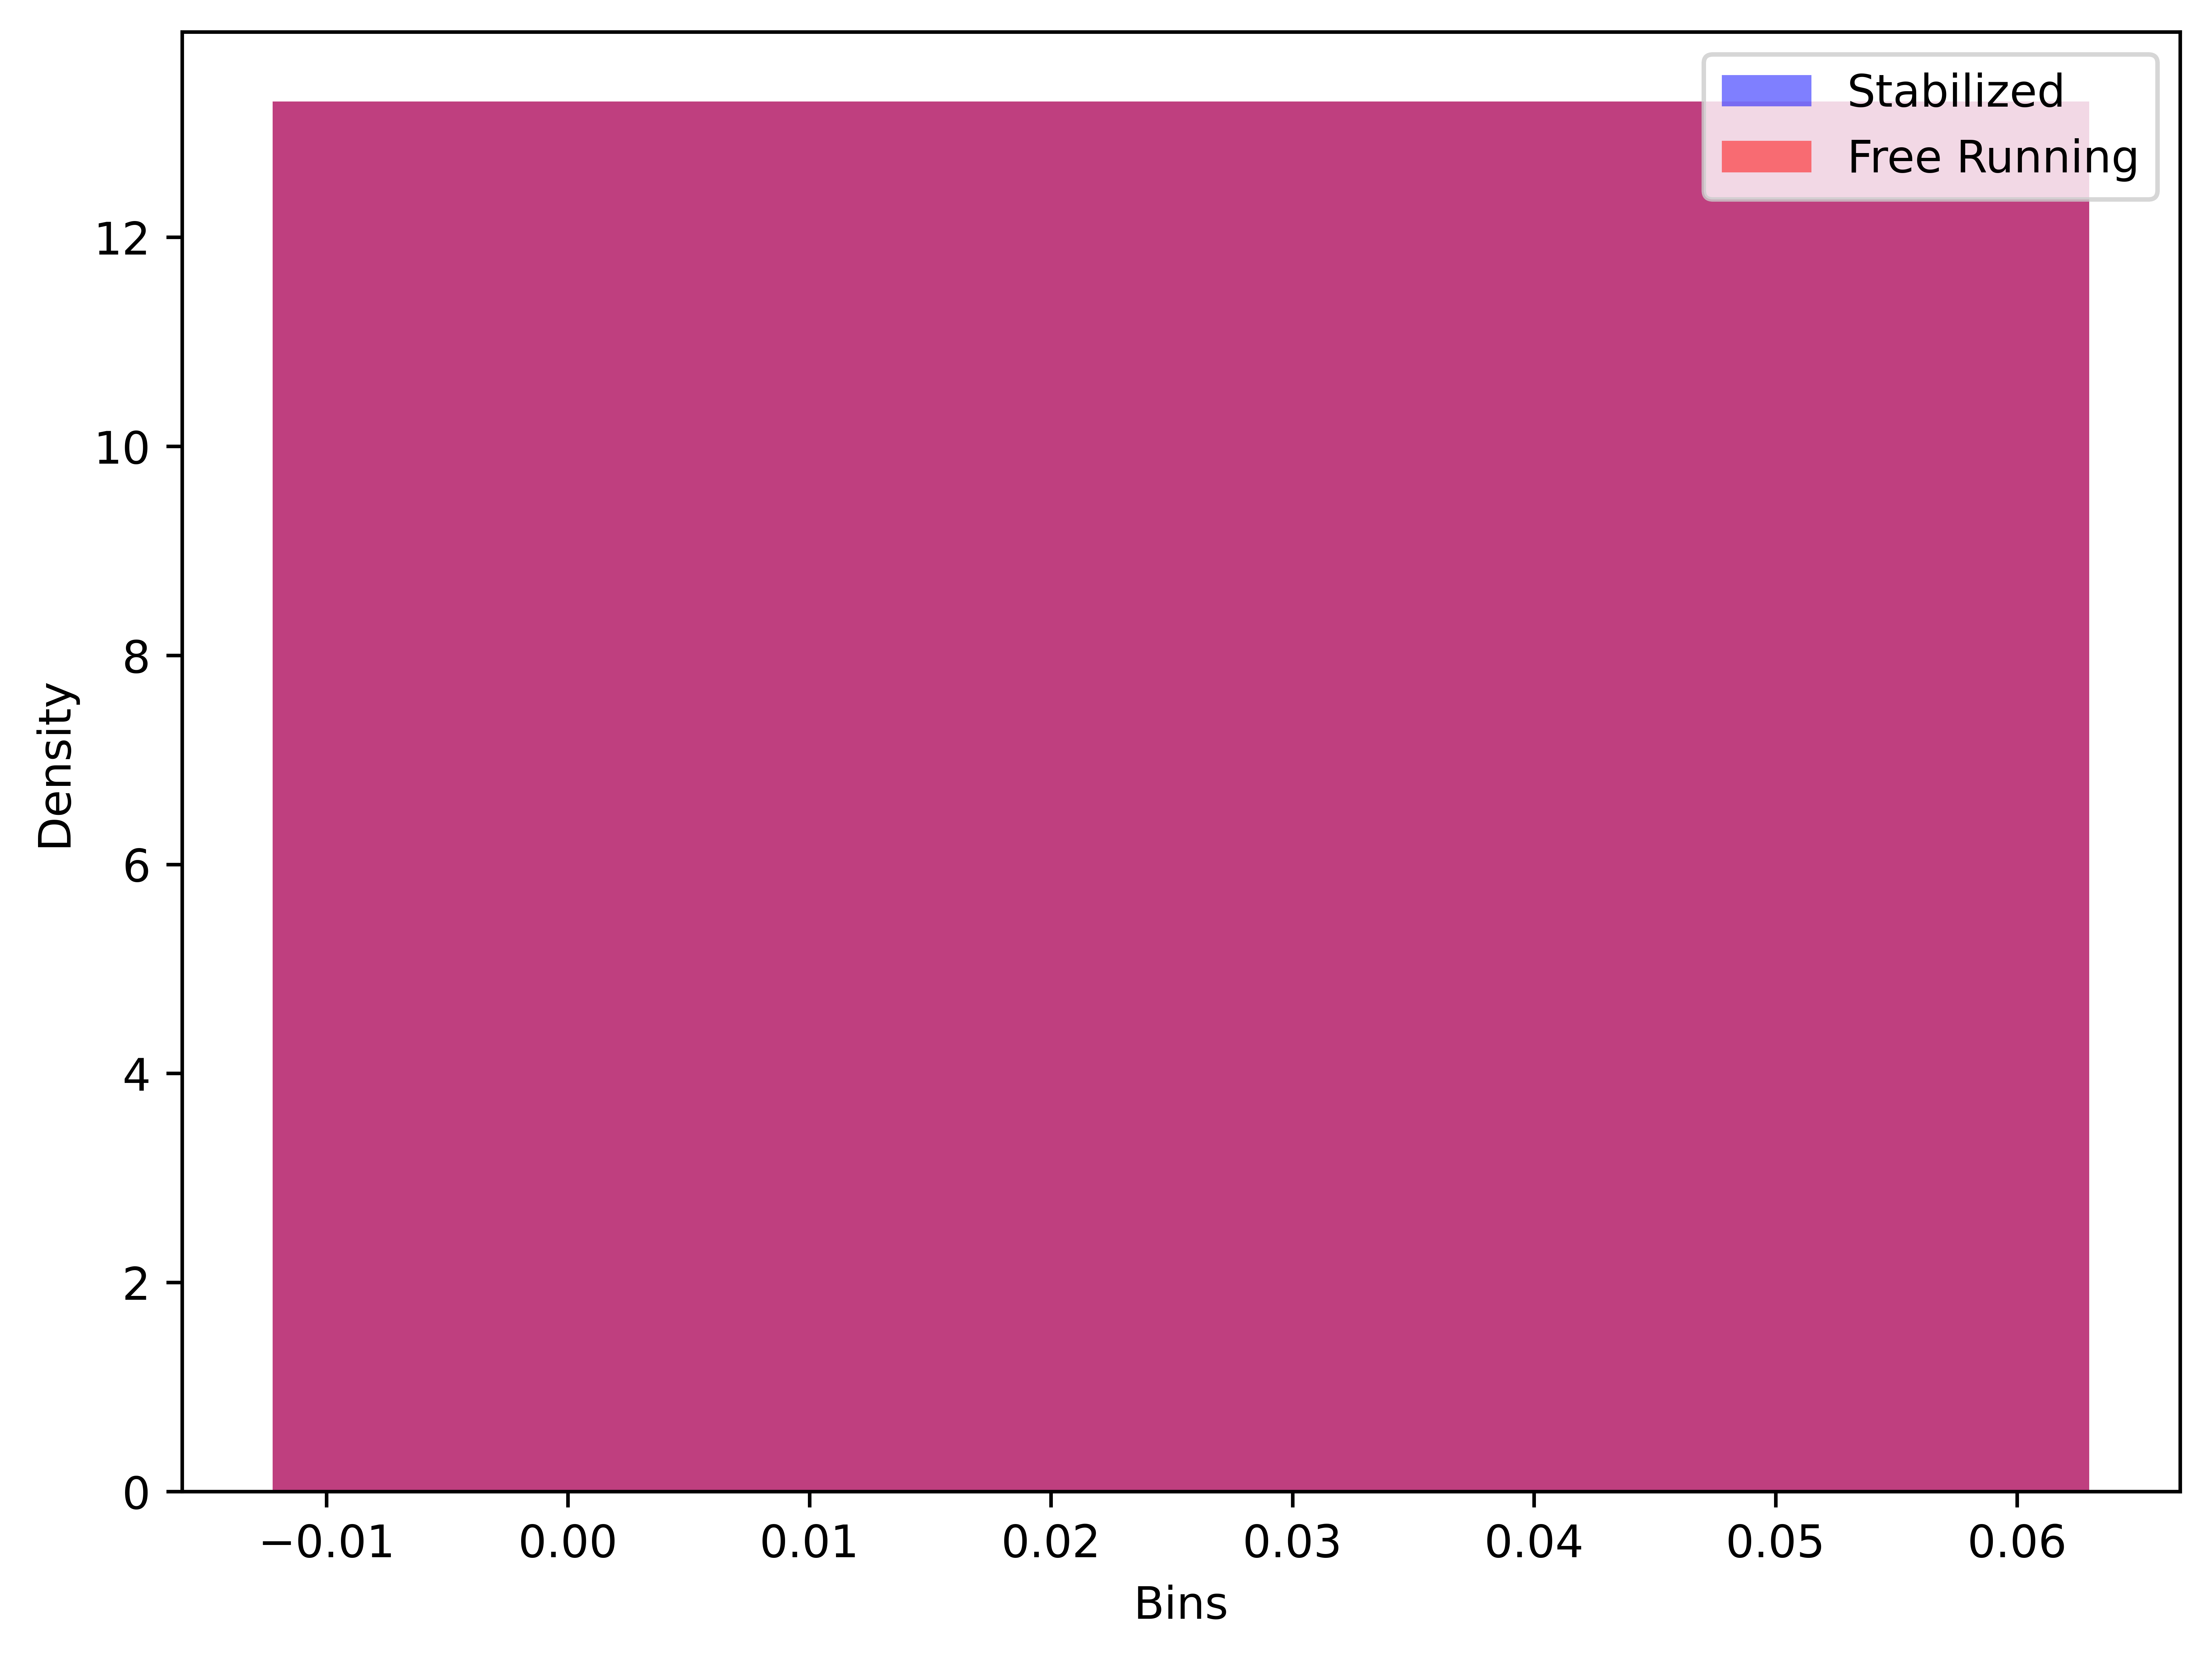

In [132]:
plt.figure(figsize=(8, 6), dpi=1000)
binning = 83

# Calculate the bin edges for both datasets
ch2comp_hist, ch2comp_bins, _ = plt.hist(ch2comp, bins=binning, color='blue', density=True, alpha=0.5, label='Stabilized')
ch2_hist, ch2_bins, _ = plt.hist(ch2, bins=binning, color='red', density=True, alpha=0.5, label='Free Running')

# Find the common range for the bin boundaries
common_bins = min(ch2comp_bins[0], ch2_bins[0]), max(ch2comp_bins[-1], ch2_bins[-1])

# Plot the histograms again with aligned binning
plt.figure(figsize=(8, 6), dpi=1000)
plt.hist(ch2comp, bins=common_bins, color='blue', density=True, alpha=0.5, label='Stabilized')
plt.hist(ch2, bins=common_bins, color='red', density=True, alpha=0.5, label='Free Running')

# Additional plot customization
plt.xlabel('Bins')
plt.ylabel('Density')
plt.legend()
plt.show()


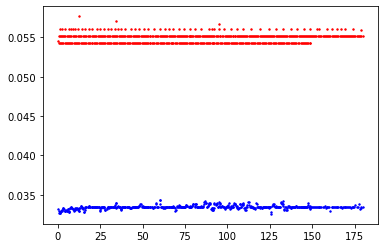

In [93]:
ch2_mod = np.array(average_chunks(ch2,500))
ch1_mod = np.array(average_chunks(ch1,500))
time_mod = np.array(median_chunks(time,500))

plt.scatter(time_mod, ch2_mod, s=8, c='red', marker='.', label = "Stabilized Signal")
plt.scatter(time_mod, ch1_mod, s=8, c='blue', marker='.', label = "Raw Signal")

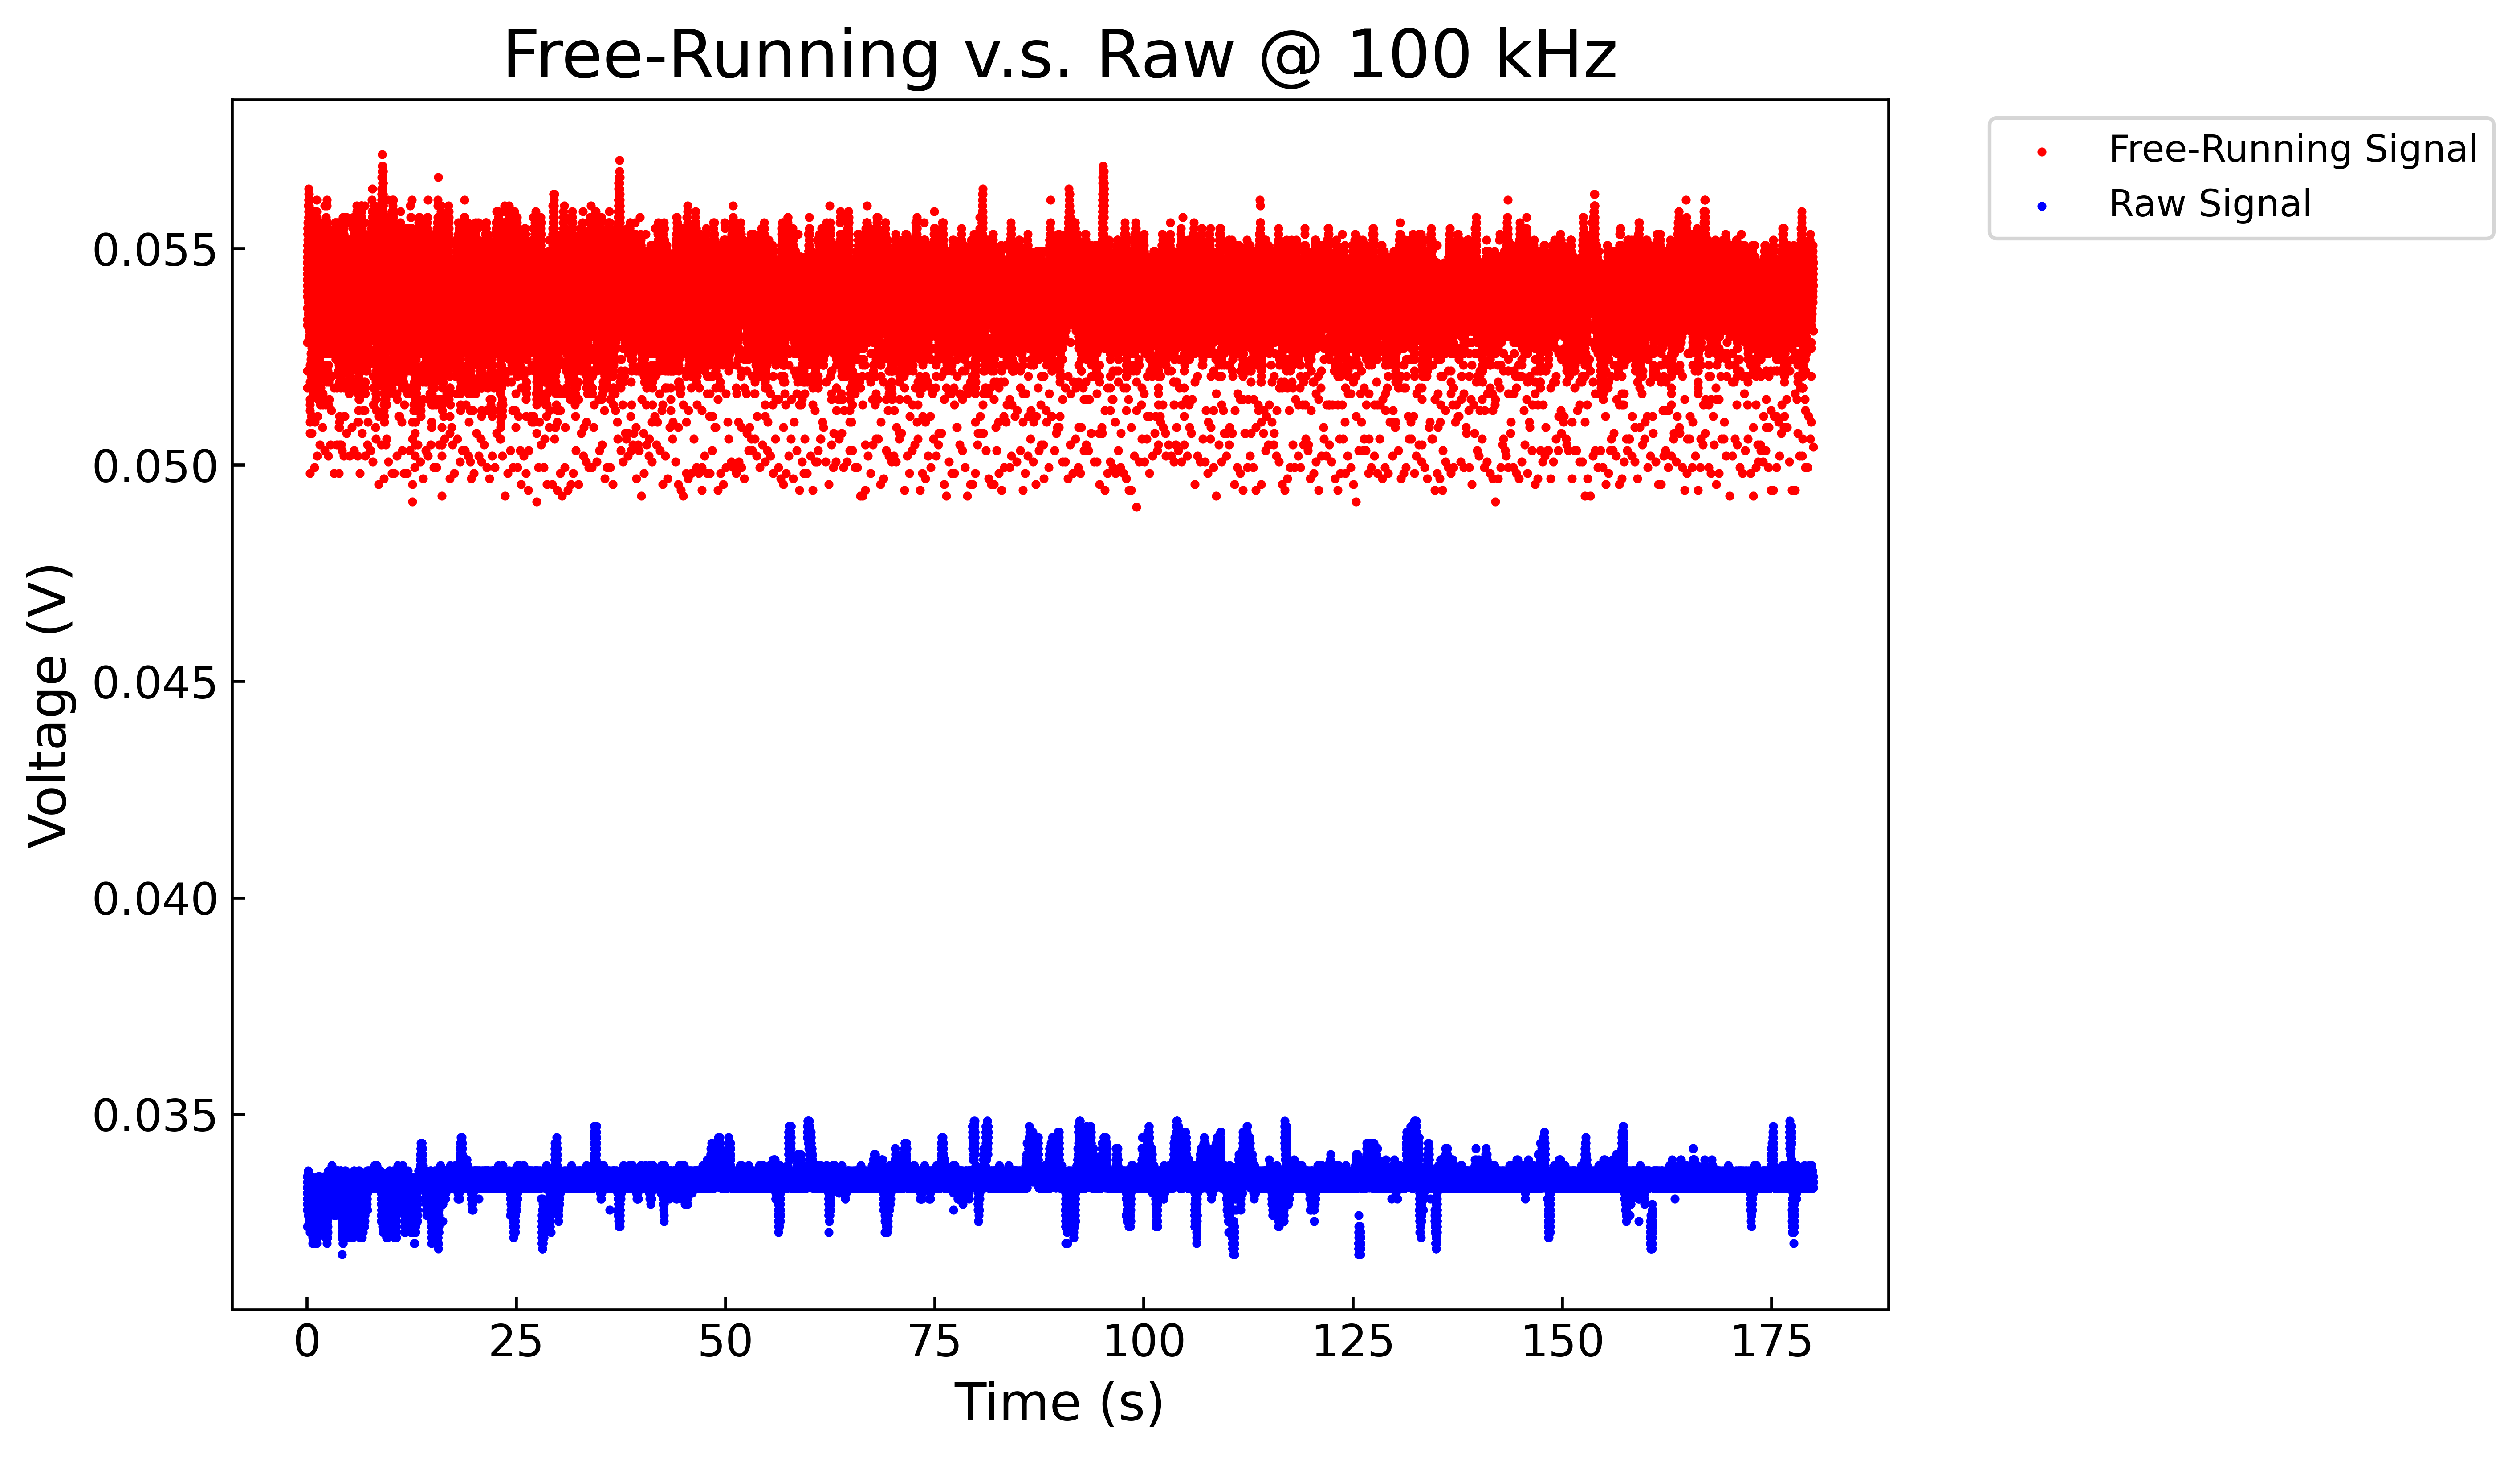

In [102]:
data = []
directory = 'C:\\Users\\scientist\\code\\jam\\tommy\\PLIS\\Good PLIS Data'
timestamp = '20230604_171233' # '20230531_234133'


file_index = 58 # Change this to include how many files
for file_index in range(1, file_index + 1):
    csv_file = f'{directory}/data_{timestamp}_{file_index}.csv'
    data_chunk = np.genfromtxt(csv_file, delimiter=',', skip_header=1)
    data.append(data_chunk)

# Concatenate the data chunks into a single array
data = np.concatenate(data)

# Extract the time, channel 1, and channel 2 arrays
time = data[:, 0]
ch1 = data[:, 1]
ch2 = data[:, 2]

indices_to_remove = []

'''
for i in range(len(time)):
    if(ch2[i] < 0.048):
        indices_to_remove.append(i)

mask = np.ones_like(time, dtype=bool)
mask[indices_to_remove] = False

time = time[mask]
ch1 = ch1[mask]
ch2 = ch2[mask]
'''
fig = plt.figure(figsize=(8, 6), dpi=600)
plt.tick_params(axis='both', labelsize=12, direction='in')
# plt.scatter(time, ch2, s=1)

'''
ch1_adjusted = []
t_adjusted = []
for i in range(len(ch1)):
    if ch1[i] > 0.1:
        ch1_adjusted.append(ch1[i])
        t_adjusted.append(time[i])
'''
# plt.scatter(time, ch1, s = 3, label = "stabilized - CoV = " + str(np.std(ch1)/np.mean(ch1)))
# # plt.scatter(time, ch3-0.5, s=1)
# plt.plot(time, ch2-0.08, 'r.', ms=3, label = "raw (-0.08 V offset) - CoV = " + str(np.std(ch2)/np.mean(ch2)))
# # plt.plot(time, ch1)
#

# n, indexes = get_max_floats(ch2, 0.2546)
# ch2 = np.array([ch2[i] for i in indexes])
# ch1 = np.array([ch1[i] for i in indexes])
# time = np.array([time[i] for i in indexes])

ch2 = np.array(average_chunks(ch2,7))
ch1 = np.array(average_chunks(ch1,7))
time = np.array(median_chunks(time,7))

plt.scatter(time, ch2, s=8, c='red', marker='.', label = "Free-Running Signal")
plt.scatter(time, ch1, s=8, c='blue', marker='.', label = "Raw Signal")
# plt.ylim(0, 2.75)
# plt.xlim(2.9, 3.1)

plt.xlabel("Time (s)", fontsize=14)
plt.ylabel("Voltage (V)", fontsize=14)
plt.title("Free-Running v.s. Raw @ 100 kHz", fontsize=18)
#plt.legend(['Raw Signal', 'Stabilized Signal', ], loc='upper left', prop={'size': 10})
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.savefig('C:\\Users\\scientist\\Desktop\\PLIS Temp Graphs\\10kHz_2.png', dpi=600, bbox_inches='tight')'''

(array([6.00000e+00, 2.60000e+01, 4.58000e+02, 3.54300e+03, 4.91040e+04,
        3.08910e+04, 1.30970e+04, 2.45600e+03, 3.41700e+03, 1.24900e+03,
        8.50000e+02, 7.24000e+02, 1.80200e+03, 6.58000e+02, 4.01000e+02,
        6.33000e+02, 1.30100e+03, 4.75000e+02, 4.31000e+02, 3.16000e+02,
        7.15000e+02, 5.74000e+02, 4.83000e+02, 4.36000e+02, 3.15000e+02,
        3.18000e+02, 3.89000e+02, 7.50000e+02, 3.79000e+02, 4.75000e+02,
        1.37000e+02, 2.24000e+02, 3.52000e+02, 1.23500e+03, 2.30000e+02,
        1.19000e+02, 1.97000e+02, 7.69000e+02, 6.90000e+02, 4.33000e+02,
        1.66000e+02, 5.81000e+02, 6.12000e+02, 5.00000e+02, 3.86000e+02,
        5.78000e+02, 9.99000e+02, 6.38000e+02, 8.83000e+02, 5.31000e+02,
        1.61500e+03, 9.33000e+02, 1.00300e+03, 1.10400e+03, 5.94800e+03,
        1.75030e+04, 2.73740e+04, 2.06933e+05, 2.64633e+05, 3.11110e+04,
        9.66000e+02, 3.36000e+02, 9.00000e+00]),
 array([-0.01196   , -0.01082095, -0.0096819 , -0.00854286, -0.00740381,
  

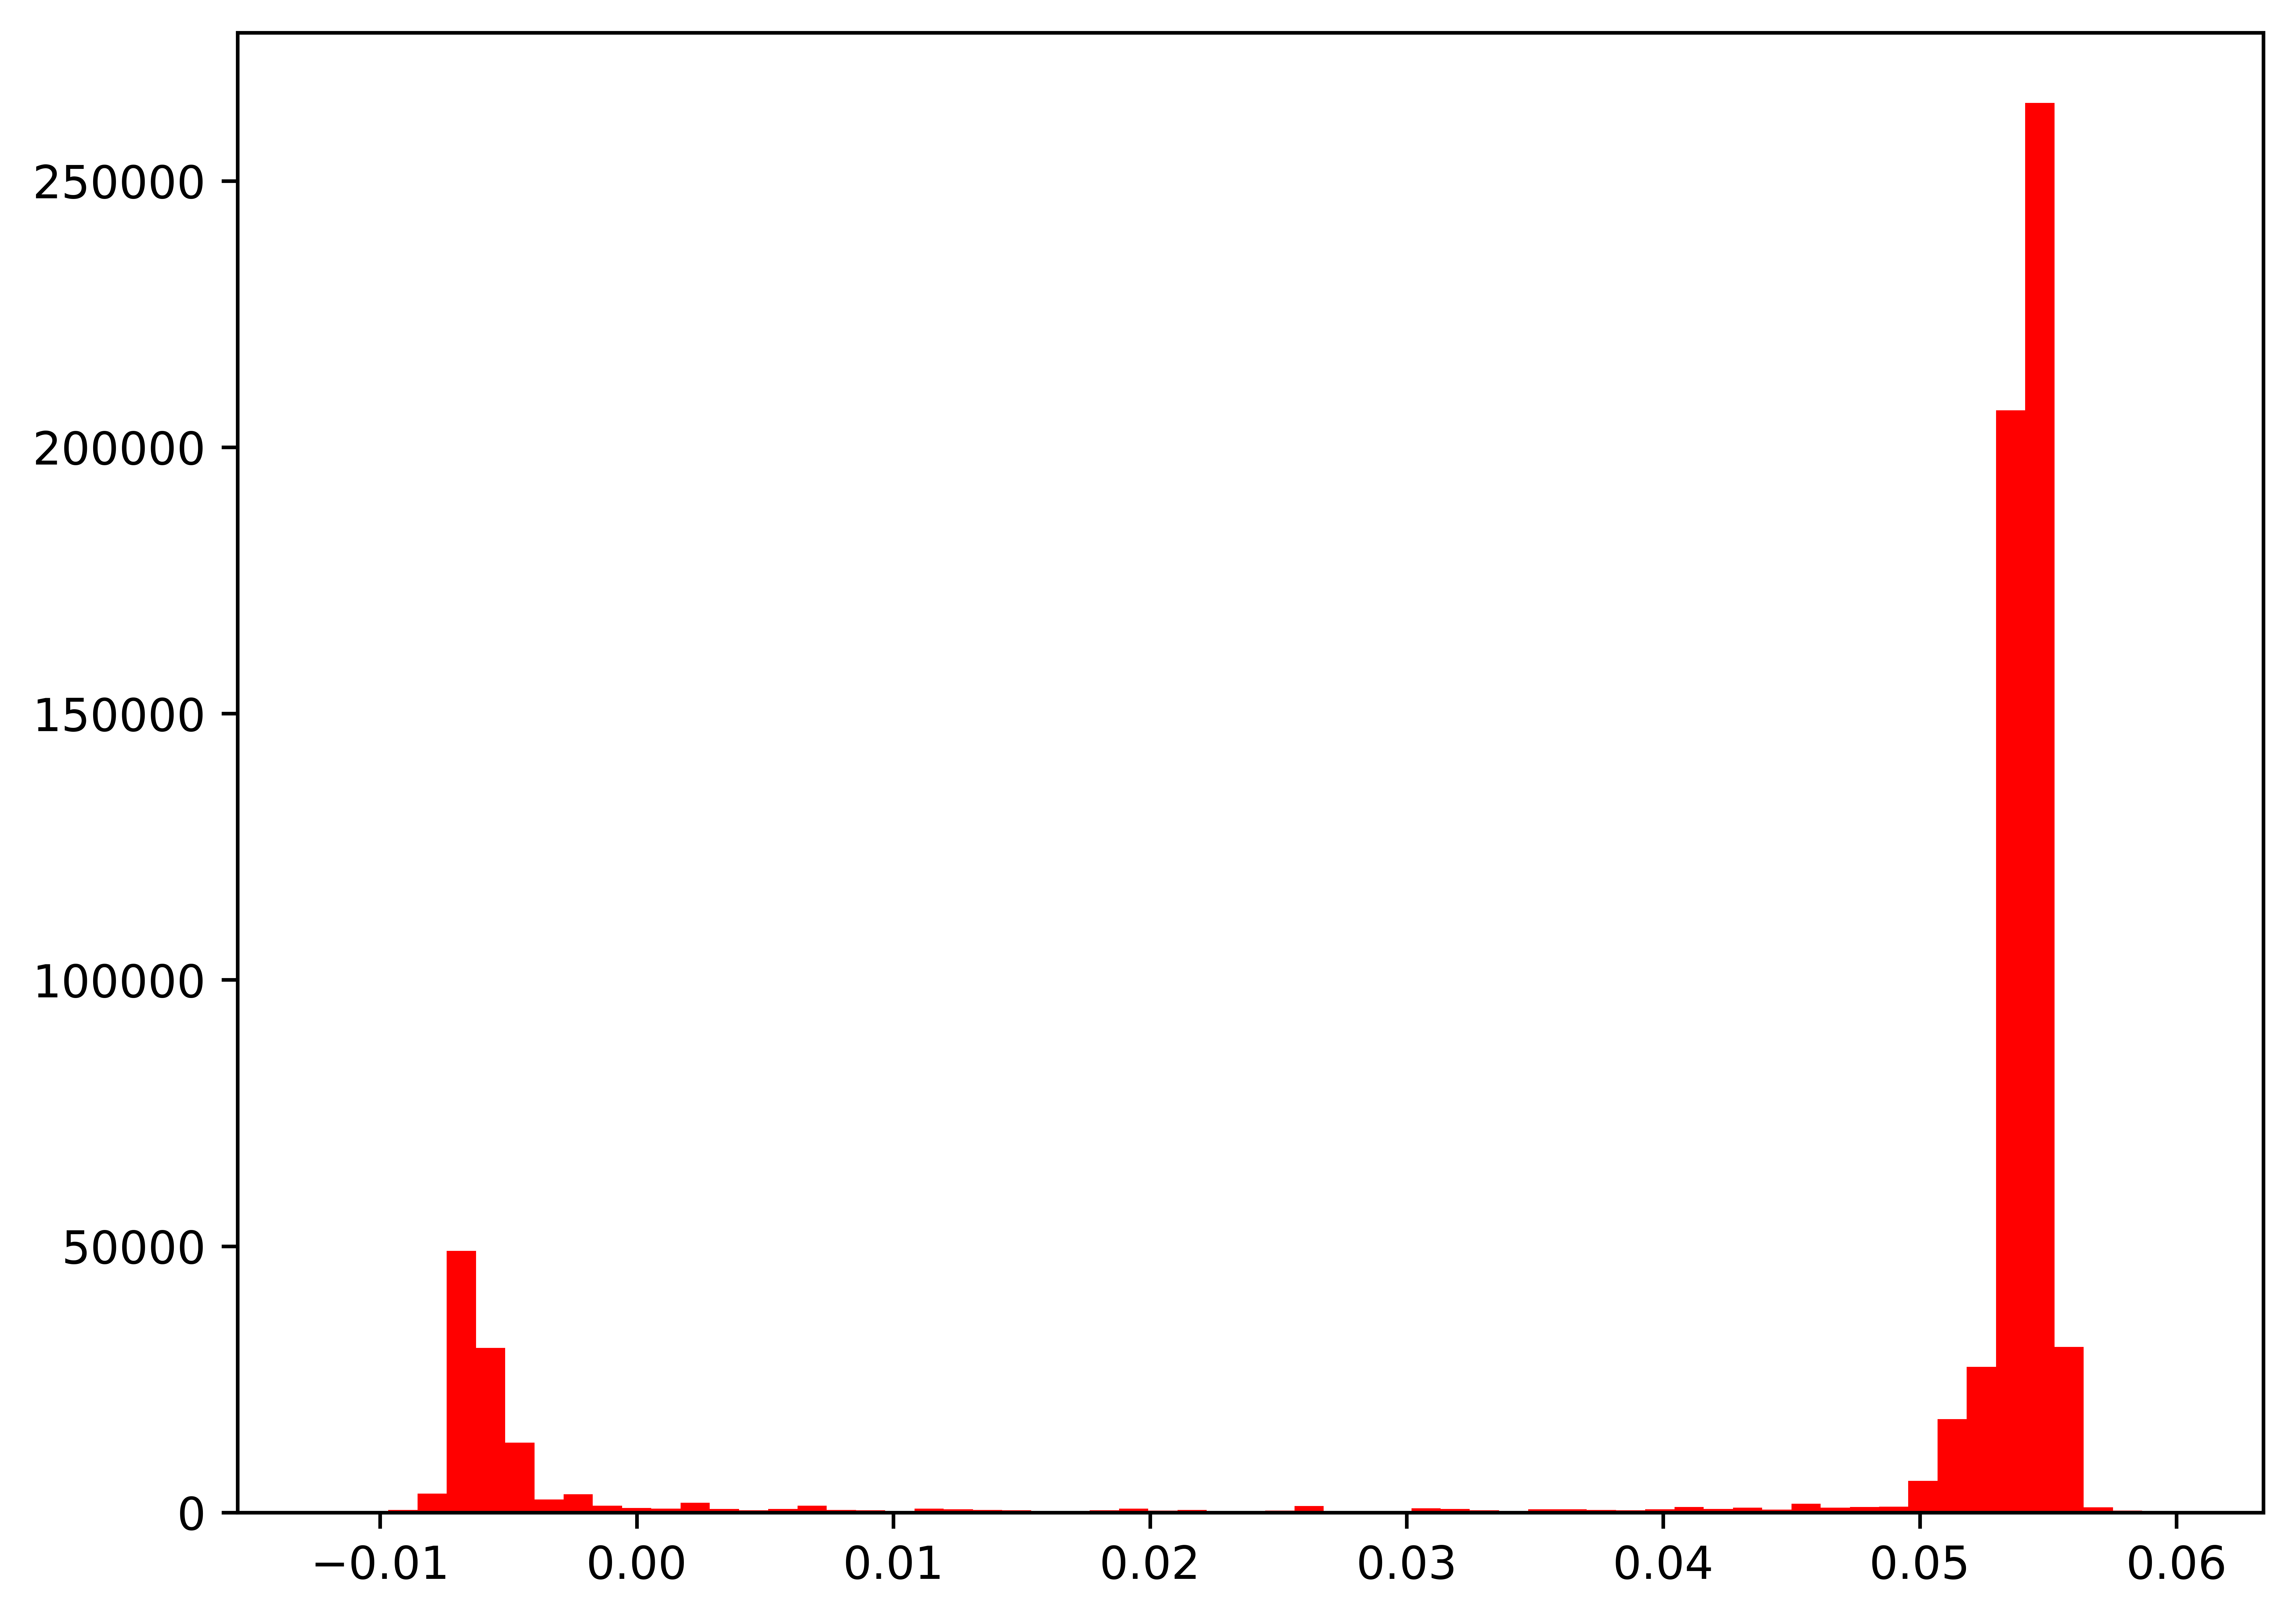

In [97]:
plt.figure(figsize=(8,6), dpi=1000)
binning = 63
plt.hist(ch2, bins=binning, color='red')
#plt.hist(ch1, bins=binning, color='blue')

In [158]:
def mean(streams):

    '''streams - list of data streams [x1, y1, y2, ...]'''
    means = []
    for stream in streams:
        means.append(np.average(stream))
    return means

def standard_deviation(streams):

    std = []
    for stream in streams:
        std.append(np.std(stream))
    return std

print(np.std(ch1)/np.average(ch1))
print(np.std(ch2)/np.average(ch2))

0.011265216761898839
0.00924556612460136


In [137]:
def calculate_percentage_ranges(data):
    num_ranges = 20  # Number of ranges
    range_width = 0.05  # Width of each range
    ranges = {}

    # Initialize the ranges dictionary
    for i in range(num_ranges):
        range_start = i * range_width
        range_end = range_start + range_width
        range_label = f"{range_start}-{range_end}"
        ranges[range_label] = 0

    # Count the number of floats in each range
    for num in data:
        for i in range(num_ranges):
            range_start = i * range_width
            range_end = range_start + range_width
            if range_start <= num < range_end:
                range_label = f"{range_start}-{range_end}"
                ranges[range_label] += 1

    total_count = len(data)
    percentages = {}

    # Calculate the percentage of floats in each range
    for range_label, count in ranges.items():
        percentage = (count / total_count) * 100
        percentages[range_label] = percentage

    return percentages

In [ ]:
import statistics
import scipy.stats as stats

def average_chunks(lst):
    chunked_list = [lst[i:i+100] for i in range(0, len(lst), 100)]
    averages = [sum(chunk) / len(chunk) for chunk in chunked_list]
    return averages

def median_chunks(lst):
    chunked_list = [lst[i:i+100] for i in range(0, len(lst), 100)]
    medians = [statistics.median(chunk) for chunk in chunked_list]
    return medians

def confidence_interval(data):
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)  # Use Bessel's correction for sample standard deviation
    n = len(data)
    margin_error = stats.t.ppf(0.975, df=n-1) * (sample_std / np.sqrt(n))
    lower_bound = sample_mean - margin_error
    upper_bound = sample_mean + margin_error
    return lower_bound, upper_bound


In [12]:
import numpy as np
import matplotlib.pyplot as plt
'''
# Specify the path to your CSV file
csv_file = 'C:\\Users\\scientist\\code\\jam\\tommy\\PLIS\\Good PLIS Data\\from_scope\\p2pst.csv'

# ch3 = np.genfromtxt(csv_file, delimiter=',', skip_header = 2, usecols = 1)
ch4 = np.genfromtxt(csv_file, delimiter=',', skip_header = 2, usecols = 2)

time = []
for i in range(len(ch4)):
    time.append(-0.00012 + i * 2e-7)
    
    
mod_ch4 = []
mod_time = []
for i in range(len(ch3)):
    if(ch4[i] > 0.038):
        mod_ch4.append(ch4[i])
        mod_time.append(time[i])
        
# ch3 = np.array(average_chunks(ch3,1))
mod_ch4 = np.array(average_chunks(mod_ch4,1))
mod_time = np.array(median_chunks(mod_time,1))

# plt.scatter(time, ch3)
plt.scatter(mod_time, mod_ch4)
# plt.xlim(-0.00002, 0.00002)
plt.ylim(-0.06, 0.08)
plt.title("ST")

print("NST: ")
print(np.std(mod_ch4)/np.mean(mod_ch4))
'''


csv_file = 'C:\\Users\\scientist\\code\\jam\\tommy\\PLIS\\Good PLIS Data\\from_scope\\10st.csv'

ch4 = np.genfromtxt(csv_file, delimiter=',', skip_header = 2, usecols = 1, max_rows=150000)

time = np.array([])
for i in range(len(ch4)):
    time = np.append(time, -3*1000000 + i*2)


# mod_ch4 = []
# mod_time = []
# for i in range(len(ch3)):
#     if(ch4[i] > 0.038):
#         mod_ch4.append(ch4[i])
#         mod_time.append(time[i])
        
        
# mod_ch3 = np.array(average_chunks(ch3,1))
# mod_ch4 = np.array(average_chunks(mod_ch4,1))
# mod_time = np.array(median_chunks(mod_time,1))

fig = plt.figure(figsize=(12,8), dpi=1000)
plt.scatter(time, ch4, s=5)
# plt.xlim(-0.00001, 0.00001)
# plt.ylim(0.04, 0.065)
plt.title("100 Pulse Trace", fontsize = 18)
plt.grid()
plt.tick_params(axis='both', labelsize=10, direction='in')

plt.yticks(np.arange(-0.01, 0.07, 0.01))
plt.xlabel("Time (ns)", fontsize = 14)
plt.ylabel("Voltage (V)", fontsize = 14)


print("CV: ")
print(np.std(ch4)/np.mean(ch4))

CV: 
1.117177216618917


In [13]:
plt.figure(figsize=(12,8), dpi=1000)
plt.hist(ch4, bins=50, color='red')

plt.title("Stabilized Signal over 300 us", fontsize = 18)
plt.xlabel("Voltage (V)", fontsize = 14)
plt.ylabel("Number of Counts", fontsize = 14)
# ch4_truncate = truncator(ch4, 0.04)
#plt.semilogy()

plt.savefig('C:\\Users\\scientist\\code\\pulsed_laser_intensity_stabilization\\300 us stabilized.png', dpi=1000)

0.030292234503635235
0.001608218029748748


Text(0, 0.5, 'Number of Peaks')

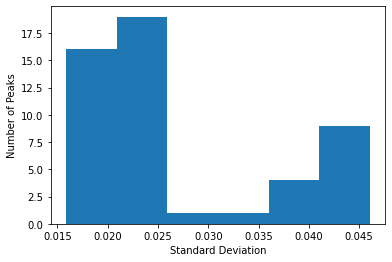

In [146]:
print(np.std(ch4_truncate)/np.mean(ch4_truncate))
print(np.std(ch4_truncate))
np.mean(ch4_truncate)

np.size(ch4_truncate)

temp = np.array([])
for n in range(50):
    temp = np.append(temp, np.std(ch4_truncate[ 100+n*700:n*700+800])/np.mean(ch4_truncate[100+n*700:n*700+800]))

plt.hist(temp, bins=6)
plt.xlabel("Standard Deviation")
plt.ylabel("Number of Peaks")

In [10]:
import numpy as np
import matplotlib.pyplot as plt

csv_file123 = 'C:\\Users\\scientist\\code\\jam\\tommy\\PLIS\\Good PLIS Data\\from_scope\\10strawxvwwxxwvvwwx.csv'

ch4123 = np.genfromtxt(csv_file123, delimiter=',', skip_header = 2, usecols = 1, max_rows=150000)
fig = plt.figure(figsize=(12,8), dpi=1000)
plt.hist(ch4123, bins = 10, color='blue')
plt.title("Raw Signals over 300 us", fontsize = 18)
plt.xlabel("Voltage (V)", fontsize = 14)
plt.ylabel("Number of Counts", fontsize = 14)
# plt.savefig('C:\\Users\\scientist\\code\\pulsed_laser_intensity_stabilization\\300 us raw.png', dpi=1000)

In [81]:
np.std(ch4123)/np.mean(ch4123)

0.012107494876019392